In [1]:
import numpy as np
import pandas as pd
import pickle
from random import shuffle
# from src.pre_process import o_config
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import operator
from tqdm import tqdm

In [4]:
def read(data_name):
    if data_name == 'adult':
#         path = '/home/xyan22/thesis/data/adult/'
        path = '/Users/yanxinzhou/course/thesis/data/adult/'
        train = pd.read_csv(path + 'train.csv', index_col=False)
        test = pd.read_csv(path + 'test.csv', index_col=False)

        fea_train = ['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', \
                     'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', \
                     'native-country']
        fea_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', \
                   'sex', 'native-country']

        train_x = train[fea_train]
        test_x = test[fea_train]
        train_y = train['salary']
        test_y = test['salary']

        for f in fea_cat:
            train_x[f] = train_x[f].astype('category')
            test_x[f] = test_x[f].astype('category')

        for f in fea_cat:
            mapping = dict(zip(list(train_x[f].cat.categories),
                               list(range(len(train_x[f].cat.categories)))))
            train_x = train_x.replace({f: mapping})
            test_x = test_x.replace({f: mapping})

        return train_x, train_y, test_x, test_y


In [5]:
data_name = 'adult'
train_x, train_y, test_x, test_y = read(data_name)

/Users/yanxinzhou/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yanxinzhou/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
from sklearn.naive_bayes import GaussianNB

In [8]:
clf = GaussianNB(priors=[0.7,0.3])
clf.fit(train_x, train_y)

GaussianNB(priors=[0.7, 0.3])

In [10]:
preds=clf.predict_proba(train_x)

In [20]:
diction1=dict(zip(list(np.where(train_y==' <=50K'))[0], preds[train_y==' <=50K',0]))

In [34]:
diction1[28200], diction1[22858]

(8.089794523806004e-08, 0.0002008926048246254)

In [35]:
diction1=sorted(diction1,key=diction1.__getitem__)

In [36]:
diction1

[6433,
 20176,
 15376,
 7186,
 17039,
 106,
 4568,
 3593,
 30781,
 8963,
 14756,
 6979,
 3961,
 11219,
 9374,
 6232,
 21133,
 23802,
 20416,
 11902,
 15942,
 23054,
 21933,
 22504,
 15986,
 29854,
 28333,
 32434,
 11872,
 25793,
 8321,
 610,
 10035,
 26556,
 23642,
 14519,
 2200,
 30984,
 27330,
 2792,
 13285,
 11280,
 16313,
 9505,
 27711,
 4118,
 30728,
 24143,
 12929,
 23238,
 17897,
 22980,
 1730,
 32354,
 4672,
 13689,
 11005,
 22754,
 16859,
 12421,
 7105,
 26995,
 16213,
 20827,
 26549,
 4500,
 25321,
 21162,
 17269,
 1768,
 21725,
 21284,
 15974,
 22295,
 18725,
 14689,
 15935,
 3101,
 27660,
 27349,
 24185,
 9309,
 30872,
 786,
 13328,
 11580,
 7593,
 10450,
 31735,
 18848,
 28423,
 19570,
 4581,
 16362,
 26287,
 22247,
 23145,
 1524,
 732,
 15036,
 1777,
 22342,
 24307,
 28200,
 19448,
 29923,
 18036,
 13827,
 28193,
 25787,
 20424,
 12132,
 6125,
 20969,
 381,
 10612,
 25602,
 4091,
 15044,
 15625,
 29603,
 2784,
 14224,
 17949,
 2017,
 3343,
 11586,
 25819,
 19852,
 5592,
 

In [56]:
for fea in list(train_x):
    test_x[fea]=10*(test_x[fea]-test_x[fea].min())/(test_x[fea].max()-test_x[fea].min())

In [49]:
train_x.describe()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,2.956390,4.836115,1.205453,6.865473,6.053786,4.353060,4.694815,2.892724,9.164645,6.692055,0.107766,0.200422,4.024230,8.955821
std,1.868552,1.819950,0.716847,2.580176,1.715147,2.510370,3.020612,3.213542,2.122014,4.705064,0.738537,0.925069,1.259942,1.908239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.506849,5.000000,0.716793,6.000000,5.333333,3.333333,2.142857,0.000000,10.000000,0.000000,0.000000,0.000000,3.979592,9.512195
50%,2.739726,5.000000,1.127878,7.333333,6.000000,3.333333,5.000000,2.000000,10.000000,10.000000,0.000000,0.000000,3.979592,9.512195
75%,4.246575,5.000000,1.526507,8.000000,7.333333,6.666667,7.142857,6.000000,10.000000,10.000000,0.000000,0.000000,4.489796,9.512195
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [60]:
cls=TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0,
                 n_iter=1000, n_iter_without_progress=300,
                 min_grad_norm=1e-07, metric="euclidean", init="random", verbose=0, random_state=None,
                 method="barnes_hut", angle=0.5)

X_embedded = cls.fit_transform(test_x[:2000])

In [51]:
X_embedded.shape

(2000, 2)

In [28]:
X_embedded[:,0].shape

(32561,)

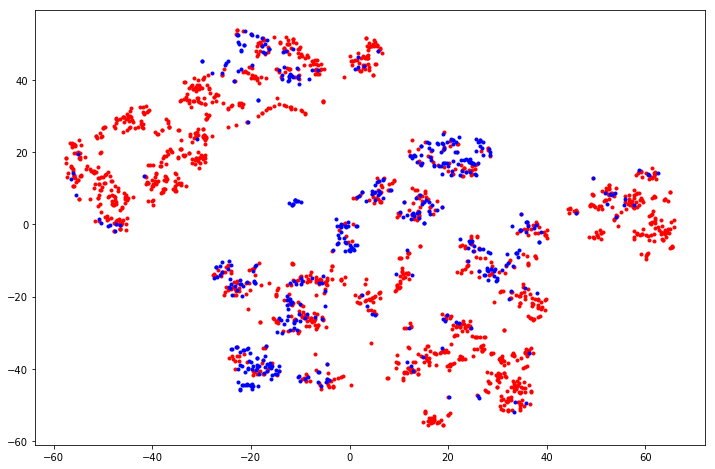

In [61]:
plt.figure(figsize=(12,8))
plt.plot(X_embedded[test_y[:2000]==' <=50K.',0], X_embedded[test_y[:2000]==' <=50K.',1], 'r.')
plt.plot(X_embedded[test_y[:2000]==' >50K.',0], X_embedded[test_y[:2000]==' >50K.',1], 'b.')
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression(penalty='l2',dual=False,tol=0.001,C=1,
                       fit_intercept=True, intercept_scaling=1,
                       class_weight={' <=50K':1, ' >50K':1.8}, random_state=123,
                       solver="sag",max_iter=1000, multi_class='ovr',
                        verbose=0, n_jobs=4)
cls.fit(train_x, train_y)
preds=cls.predict(test_x)
# labels = [' <=50K.', ' >50K.']
# preds=[x +'.' for x in preds]

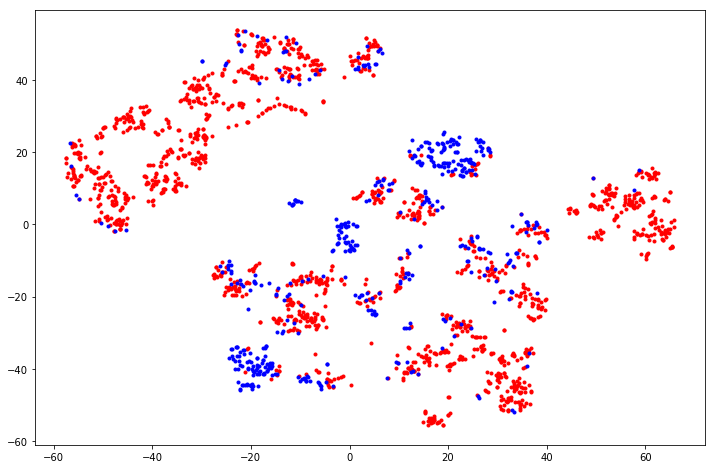

In [78]:
plt.figure(figsize=(12,8))
plt.plot(X_embedded[preds[:2000]==' <=50K',0], X_embedded[preds[:2000]==' <=50K',1], 'r.')
plt.plot(X_embedded[preds[:2000]==' >50K',0], X_embedded[preds[:2000]==' >50K',1], 'b.')
plt.show()

In [88]:
path = '/Users/yanxinzhou/course/thesis/adult/'
from sklearn.externals import joblib
with open('/Users/yanxinzhou/course/pred.pkl','rb') as f:
    preds=joblib.load(f)

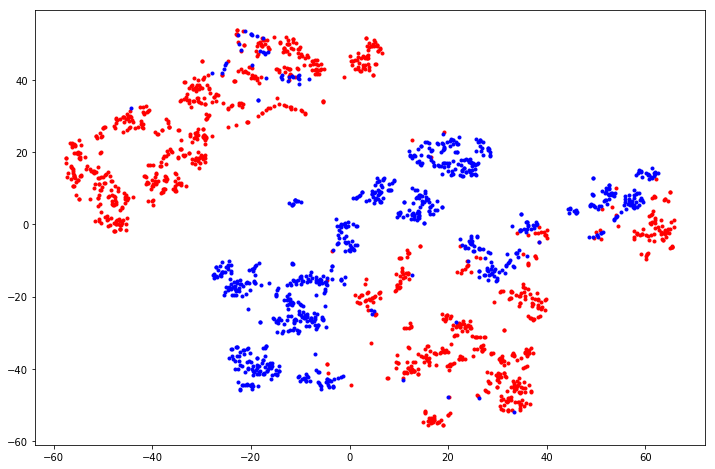

In [90]:
plt.figure(figsize=(12,8))
plt.plot(X_embedded[preds[:2000]==0,0], X_embedded[preds[:2000]==0,1], 'r.')
plt.plot(X_embedded[preds[:2000]==1,0], X_embedded[preds[:2000]==1,1], 'b.')
plt.show()

In [92]:
df=pd.DataFrame.from_csv('/Users/yanxinzhou/course/kaggle/agriculture/data/tweet/Tweets.csv')

/Users/yanxinzhou/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


In [98]:
df[['airline_sentiment','text']].head(20)

,airline_sentiment,text
tweet_id,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.
570301130888122368,positive,@VirginAmerica plus you've added commercials t...
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
570300817074462722,negative,@VirginAmerica and it's a really big bad thing...
570300767074181121,negative,@VirginAmerica seriously would pay $30 a fligh...
570300616901320704,positive,"@VirginAmerica yes, nearly every time I fly VX..."
570300248553349120,neutral,@VirginAmerica Really missed a prime opportuni...
570299953286942721,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"


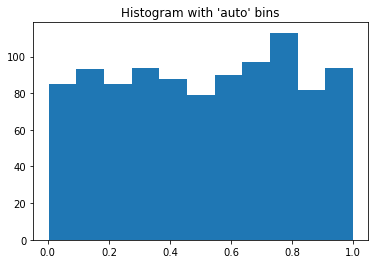

In [73]:
import matplotlib.pyplot as plt

a=np.random.beta(1,1,1000)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()